# ALPR: Automatic License Plate Recognition

From the police department to the parking lot, license plate recognition is a technology that has been used for years. It is a computer vision task that involves detecting and recognizing license plates from images or video streams. The goal of this project is to build an ALPR system using OpenCV and Tesseract OCR.

<center><img src="images/jupyter/speed_camera.jpg" width="400"/></center>
<center><a href="https://parkers-images.bauersecure.com/wp-images/176822/gatso_speed_camera.jpg">Speed Camera</a></center>

## Introduction
This repository showcases few implementations of ALPR, from using OpenCV to using deep learning models. The goal is to provide a comprehensive understanding of how ALPR works and how it can be implemented in different ways.

We split the project into two main parts:
1. **License Plate Detection**: This part focuses on detecting the license plate in an image or video stream.
2. **OCR (Optical Character Recognition)**: This part focuses on recognizing the characters on the detected license plate.

## License Plate Detection

### Methods
1. **Filtering**: Using image processing techniques to filter out the license plate from the rest of the image. This includes techniques like edge detection, contour detection, and morphological operations.

2. **YOLOv5**: Using the YOLOv5 deep learning model to detect the license plate in an image. It is a state-of-the-art object detection model that is fast and accurate.

### Filtering

First, lets import the required libraries and load the image.

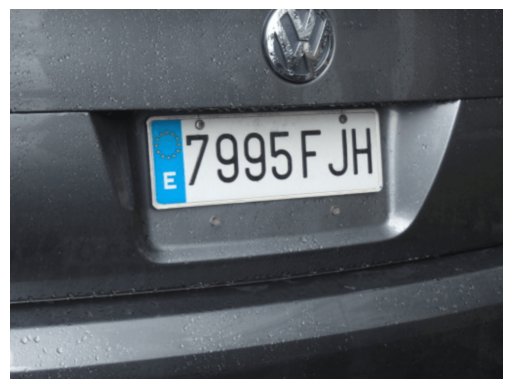

In [4]:
from skimage.segmentation import clear_border
import matplotlib.pyplot as plt
import numpy as np
import imutils
import cv2

image = cv2.imread("images/car.png")

def show_image(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

show_image(image)

Now, we will convert the image to grayscale, and then perform a **blackhat morphological operation** to highlight the text on the license plate. 

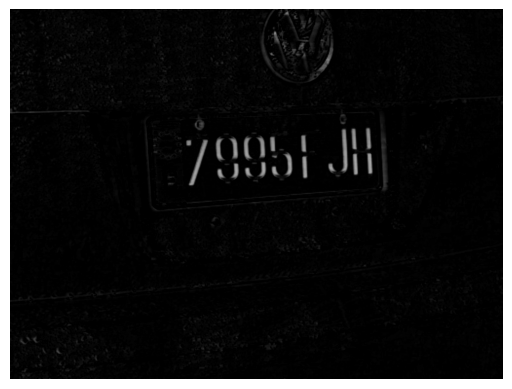

In [5]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))

blackhat = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, kernel)

show_image(blackhat)

This approach however is not very robust, and it may not work well in all cases. For example, if the license plate is not clearly visible or if there are other objects in the image that are similar to the license plate, this approach may fail.

### YOLO

We can also just use a YOLO model, which will grant way better results.